In [2]:
%matplotlib inline

In [3]:
#Filter latest set of patients by criterion. 
import h5py,os
import numpy as np
DATAFOLDER ='/home/shalit/TDGM/data_scripts/shalit/data2/NIPS_files/'

def readFeatures(fname):
    return [t.strip() for t in open(fname).readlines()]
def readHDF5(fname,datasetname):
    print 'Loading: ',datasetname
    h5file = h5py.File(fname,mode ='r')
    data = h5file[datasetname].value
    print h5file.keys()
    h5file.close()
    return data

In [4]:
datapat    = readHDF5(DATAFOLDER+'T_patient.h5','T_patient')
datapatnew = readHDF5(DATAFOLDER+'T_patient_w_binned_labs.h5','T_patient_w_binned_labs')
datapat    = np.concatenate((datapat,datapatnew[:,:,40:]),2)
print 'Concatenated Dimensions: ',datapat.shape

datapat = datapat[:,50:,:]
patdict = readFeatures(DATAFOLDER+'patient_dictionary.txt')+readFeatures(DATAFOLDER+'patient_dictionary_binned_labs.txt')
print datapat.shape,len(patdict)

Loading:  T_patient
[u'T_patient']
Loading:  T_patient_w_binned_labs
[u'T_patient_w_binned_labs']
Concatenated Dimensions:  (46804, 104, 55)
(46804, 54, 55) 55


In [5]:
datadoc = readHDF5(DATAFOLDER+'T_doctor.h5','T_doctor')
datadoc = datadoc[:,50:,:]
docdict = readFeatures(DATAFOLDER+'doctor_dictionary.txt')
print datadoc.shape,len(docdict)

Loading:  T_doctor
[u'T_doctor']
(46804, 54, 78) 78


In [6]:
#Only consider a subset of indices
ind_idx  = np.array([7,10,40,49])
patkeep_idx = np.unique(np.array([1,2,3,4,5,6,7,14,9,21,26,12,16,18,25,29,39,19,40,31,23,15,22,38,28,17,30,\
                        37,37,20,34,27,35,24,33,32,40,42,43,44,45,46,47,48,49,51,52,53,54,55])-1)
dockeep_idx = np.unique(np.array([68,53,51,50,64,67,74,59,66,70])-1) #Based on Torch Indexing, hence the -1 
#(had 15 in there (ALBUMIN))

patdict     = np.array(patdict)
datapatsmall = datapat[:,:,patkeep_idx]
patdictsmall = patdict[patkeep_idx]
print 'Patient:',datapatsmall.shape,len(patdictsmall)
docdict     = np.array(docdict)
datadocsmall = datadoc[:,:,dockeep_idx]
docdictsmall = docdict[dockeep_idx]
print 'Doctor:',datadocsmall.shape,len(docdictsmall)

inddict     = np.array(docdict)
dataindsmall = datapat[:,:,ind_idx]
inddictsmall = patdict[ind_idx]
print 'Indicators:',dataindsmall.shape,len(inddictsmall)

mids = np.array(readFeatures(DATAFOLDER+'patient_list.txt'))
print 'MIDS:',len(mids)

Patient: (46804, 54, 48) 48
Doctor: (46804, 54, 10) 10
Indicators: (46804, 54, 4) 4
MIDS: 46804


In [7]:

print docdictsmall,'\n',patdictsmall,'\n',inddictsmall

['INSULIN ASPART' 'INSULIN GLARGINE,HUM.REC.ANLOG' 'INSULIN DETEMIR'
 'SITAGLIPTIN PHOSPHATE' 'GLYBURIDE' 'GLIPIZIDE' 'GLIMEPIRIDE'
 'REPAGLINIDE' 'METFORMIN HCL' 'PIOGLITAZONE HCL'] 
['age_lt49' 'age_lt57' 'age_lt63' 'age_lt70' 'age_lt98' 'gender_isF'
 'coverage' 'A1C_high' 'Gluc_high' 'DMII wo cmp nt st uncntrn'
 'DMI wo cmp nt st uncntrln' 'DMII wo cmp uncntrldn' 'Gout NOSn'
 'Obesity NOSn' 'Morbid obesityn' 'Anemia in chr kidney disn'
 'Obstructive sleep apnean' 'Malignant hypertensionn'
 'Benign hyp ht dis w/o hfn' 'Hyp hrt dis NOS w/o hfn'
 'Cor ath unsp vsl ntv/gftn' 'Crnry athrscl natve vssln'
 'Chr ischemic hrt dis NOSn' 'Prim cardiomyopathy NECn' 'CHF NOSn'
 'Ocl crtd art wo infrctn' 'Periph vascular dis NOSn'
 'Pleural effusion NOSn' 'Acute kidney failure NOSn'
 'Chr kidney dis stage IIIn' 'End stage renal diseasen'
 'Renal & ureteral dis NOSn' 'Sleep apnea NOSn' 'Impaired fasting glucosen'
 'Abnormal glucose NECn' 'a1c_lt_5.5' 'a1c_lt_6' 'a1c_lt_6.5' 'a1c_lt_7'
 'a1c_lt_8' 

In [8]:
#Remove patients with no actions and no drug information
remove_noactions = True
if remove_noactions:
    data_sub = datadocsmall.sum(1).sum(1)
    idx = np.where(data_sub>0)[0]
    print 'Patients with >0 actions: ',len(idx),' keeping them...'
    datapatfiltered_tmp = datapatsmall[idx,:,:]
    datadocfiltered_tmp = datadocsmall[idx,:,:]
    dataindfiltered_tmp = dataindsmall[idx,:,:]
    mids_filtered_tmp = mids[idx]

    print 'Doctor:',datadocfiltered_tmp.shape,len(docdictsmall)
    print 'Patient:',datapatfiltered_tmp.shape,len(patdictsmall)
    print 'Indicator:',dataindfiltered_tmp.shape,len(inddictsmall)
    print 'MIDS:',len(mids_filtered_tmp)

    datapatfiltered = datapatfiltered_tmp
    datadocfiltered = datadocfiltered_tmp
    dataindfiltered = dataindfiltered_tmp
    mids_filtered= mids_filtered_tmp
else:
    datadocfiltered = datadocsmall
    datapatfiltered = datapatsmall
    dataindfiltered = dataindsmall
    mids_filtered   = mids
print datadocfiltered.shape,len(docdictsmall)
print datapatfiltered.shape,len(patdictsmall)
print dataindfiltered.shape,len(inddictsmall)
print len(mids_filtered)

Patients with >0 actions:  12355  keeping them...
Doctor: (12355, 54, 10) 10
Patient: (12355, 54, 48) 48
Indicator: (12355, 54, 4) 4
MIDS: 12355
(12355, 54, 10) 10
(12355, 54, 48) 48
(12355, 54, 4) 4
12355


In [9]:
#Combine insulins
print 'OLD: ',docdictsmall,len(docdictsmall)
newdocdict    = []
newdoctordata = np.zeros((datadocfiltered.shape[0],datadocfiltered.shape[1],8))

newdoctordata[:,:,0] = datadocfiltered[:,:,0]+datadocfiltered[:,:,1]+datadocfiltered[:,:,2]
newdocdict.append('INSULIN GROUPED')
newdoctordata[:,:,1] = datadocfiltered[:,:,3]
newdocdict.append(docdictsmall[3])
newdoctordata[:,:,2] = datadocfiltered[:,:,4]
newdocdict.append(docdictsmall[4])
newdoctordata[:,:,3] = datadocfiltered[:,:,5]
newdocdict.append(docdictsmall[5])
newdoctordata[:,:,4] = datadocfiltered[:,:,6]
newdocdict.append(docdictsmall[6])
newdoctordata[:,:,5] = datadocfiltered[:,:,7]
newdocdict.append(docdictsmall[7])
newdoctordata[:,:,6] = datadocfiltered[:,:,8]
newdocdict.append(docdictsmall[8])
newdoctordata[:,:,7] = datadocfiltered[:,:,9]
newdocdict.append(docdictsmall[9])

newdoctordata[newdoctordata>1]=1
print newdoctordata.shape
print 'NEW:' , newdocdict,len(newdocdict)

OLD:  ['INSULIN ASPART' 'INSULIN GLARGINE,HUM.REC.ANLOG' 'INSULIN DETEMIR'
 'SITAGLIPTIN PHOSPHATE' 'GLYBURIDE' 'GLIPIZIDE' 'GLIMEPIRIDE'
 'REPAGLINIDE' 'METFORMIN HCL' 'PIOGLITAZONE HCL'] 10
(12355, 54, 8)
NEW: ['INSULIN GROUPED', 'SITAGLIPTIN PHOSPHATE', 'GLYBURIDE', 'GLIPIZIDE', 'GLIMEPIRIDE', 'REPAGLINIDE', 'METFORMIN HCL', 'PIOGLITAZONE HCL'] 8


In [10]:
#Bin by K months
print datapatfiltered.shape,len(patdictsmall)
print newdoctordata.shape,len(newdocdict)

T = newdoctordata.shape[1]
K = 3
nbins = np.ceil(T/float(K)).astype('int')
print 'T:',T,' K:',K,' nbins:',nbins

patient_filtered = np.zeros((datapatfiltered.shape[0],nbins,datapatfiltered.shape[2]))
doctor_filtered = np.zeros((newdoctordata.shape[0],nbins,newdoctordata.shape[2]))
ind_filtered = np.zeros((dataindfiltered.shape[0],nbins,dataindfiltered.shape[2]))

for idx,start_idx in enumerate(range(0,T,K)):
    end_idx = np.min([T,start_idx+K]).astype('int')
    print idx,start_idx,end_idx
    patient_filtered[:,idx,:] = datapatfiltered[:,start_idx:end_idx,:].sum(1)
    doctor_filtered[:,idx,:] = newdoctordata[:,start_idx:end_idx,:].sum(1)
    ind_filtered[:,idx,:] = dataindfiltered[:,start_idx:end_idx,:].sum(1)
patient_filtered[patient_filtered>1] = 1
doctor_filtered[doctor_filtered>1] = 1
ind_filtered[ind_filtered>1] = 1


print np.unique(doctor_filtered),np.unique(patient_filtered),np.unique(ind_filtered)

patdict_filtered = patdictsmall
docdict_filtered = newdocdict
inddict_filtered = inddictsmall

print patient_filtered.shape,len(patdict_filtered)
print doctor_filtered.shape,len(docdict_filtered)
print ind_filtered.shape,len(inddict_filtered)

(12355, 54, 48) 48
(12355, 54, 8) 8
T: 54  K: 3  nbins: 18
0 0 3
1 3 6
2 6 9
3 9 12
4 12 15
5 15 18
6 18 21
7 21 24
8 24 27
9 27 30
10 30 33
11 33 36
12 36 39
13 39 42
14 42 45
15 45 48
16 48 51
17 51 54
[ 0.  1.] [ 0.  1.] [ 0.  1.]
(12355, 18, 48) 48
(12355, 18, 8) 8
(12355, 18, 4) 4


In [11]:
def searchDict(searchstr,datadict):
    for idx,k in enumerate(datadict):
        if searchstr in k:
            return idx

#Remove patients without enough A1C information
A1Cidx = searchDict('indicator',inddict_filtered)
print inddict_filtered[A1Cidx],A1Cidx
patient_stats =  ind_filtered[:,:,A1Cidx].sum(1)
print patient_stats.shape
idx_to_keep = np.where(patient_stats>0)[0]
print idx_to_keep.shape[0]
print 'Patients with 0 A1C indicators across time: ',np.where(patient_stats==0)[0].shape[0]
print 'Patients with 1 A1C indicators across time: ',np.where(patient_stats==1)[0].shape[0]
print 'Patients with 2 A1C indicators across time: ',np.where(patient_stats==2)[0].shape[0]
print 'Patients with >3 A1C indicators across time: ',np.where(patient_stats>3)[0].shape[0]

print 'Removing patients with 0 A1C indicators'
datapatfiltered_final = patient_filtered[idx_to_keep,:,:]
datadocfiltered_final = doctor_filtered[idx_to_keep,:,:]
dataindfiltered_final = ind_filtered[idx_to_keep,:,:]
mids_filtered_final = mids_filtered[idx_to_keep]

print datapatfiltered_final.shape,len(patdict_filtered)
print datadocfiltered_final.shape,len(docdict_filtered)
print dataindfiltered_final.shape,len(inddict_filtered)
print len(mids_filtered_final)

#Number of patients with 0 actions
print '#Patients w/ 0 actions = ',len(np.where(datadocfiltered_final.sum(1).sum(1)>0)[0])

A1C_indicator 0
(12355,)
8244
Patients with 0 A1C indicators across time:  4111
Patients with 1 A1C indicators across time:  2311
Patients with 2 A1C indicators across time:  1971
Patients with >3 A1C indicators across time:  2502
Removing patients with 0 A1C indicators
(8244, 18, 48) 48
(8244, 18, 8) 8
(8244, 18, 4) 4
8244
#Patients w/ 0 actions =  8244


/sontag-md3400/usr/local/pkg/python/2.7.6/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/sontag-md3400/usr/local/pkg/python/2.7.6/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


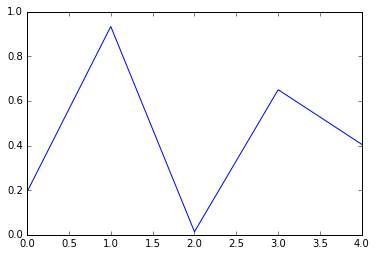

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.random.random((5,)))

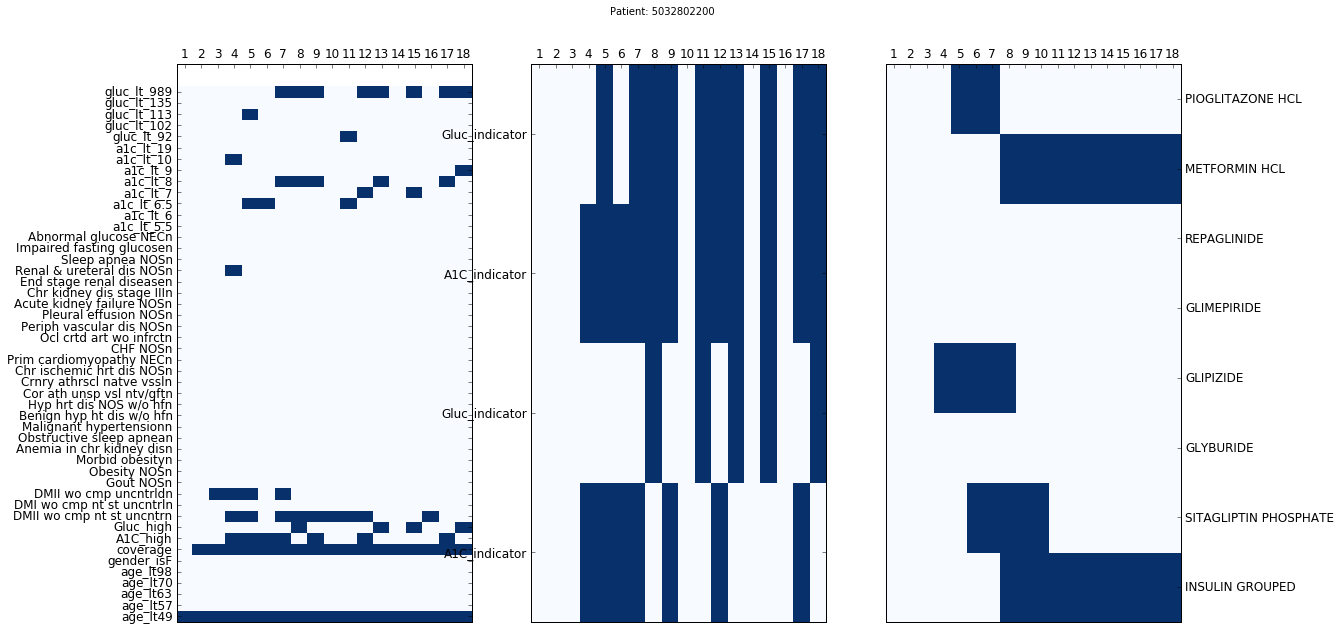

In [13]:

import numpy as np
import matplotlib.pyplot as plt

patient_data = datapatfiltered_final
doctor_data = datadocfiltered_final
ind_data    = dataindfiltered_final
mids_data    = mids_filtered_final
patdict_data = patdict_filtered.tolist()
docdict_data = np.array(docdict_filtered).tolist()
inddict_data = inddict_filtered.tolist()


shufidx = np.random.permutation(patient_data.shape[0])
for ctr in range(1):
    idx = shufidx[ctr]
    row_labels = patdict_data
    data = patient_data[idx,:,:]
    column_labels = range(1,data.shape[0]+1)
    fig, axlist = plt.subplots(1,3,figsize=(18,10))
    fig.suptitle('Patient: '+mids_data[idx])
    
    #DISPLAY OBSERVATIONS
    ax = axlist.ravel()[0]
    heatmap = ax.pcolor(data.transpose(), cmap=plt.cm.Blues)

    # put the major ticks at the middle of each cell
    ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

    # want a more natural, table-like display
    #ax.invert_xaxis()
    ax.xaxis.tick_top()

    ax.tick_params(labelsize = 12)
    ax.set_xticklabels(column_labels, minor=False)
    ax.set_yticklabels(row_labels, minor=False)
    
    #DISPLAY INDICATOR
    ax = axlist.ravel()[1]
    row_labels = inddict_data
    data = ind_data[idx,:,:]
    heatmap = ax.pcolor(data.transpose(), cmap=plt.cm.Blues)

    # put the major ticks at the middle of each cell
    ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

    # want a more natural, table-like display
    #ax.invert_xaxis()
    ax.xaxis.tick_top()

    ax.tick_params(labelsize = 12)
    ax.set_xticklabels(column_labels, minor=False)
    ax.set_yticklabels(row_labels, minor=False)

    #DISPLAY DOCTOR
    ax = axlist.ravel()[2]
    data = doctor_data[idx,:,:]
    column_labels = range(1,data.shape[0]+1)
    row_labels = docdict_data
    heatmap = ax.pcolor(data.transpose(), cmap=plt.cm.Blues)

    # put the major ticks at the middle of each cell
    ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

    # want a more natural, table-like display
    #ax.invert_xaxis()
    ax.xaxis.tick_top()
    ax.yaxis.tick_right()

    ax.tick_params(labelsize = 12)
    ax.set_xticklabels(column_labels, minor=False)
    ax.set_yticklabels(row_labels, minor=False)
    plt.show()

/sontag-md3400/usr/local/pkg/python/2.7.6/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'times'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


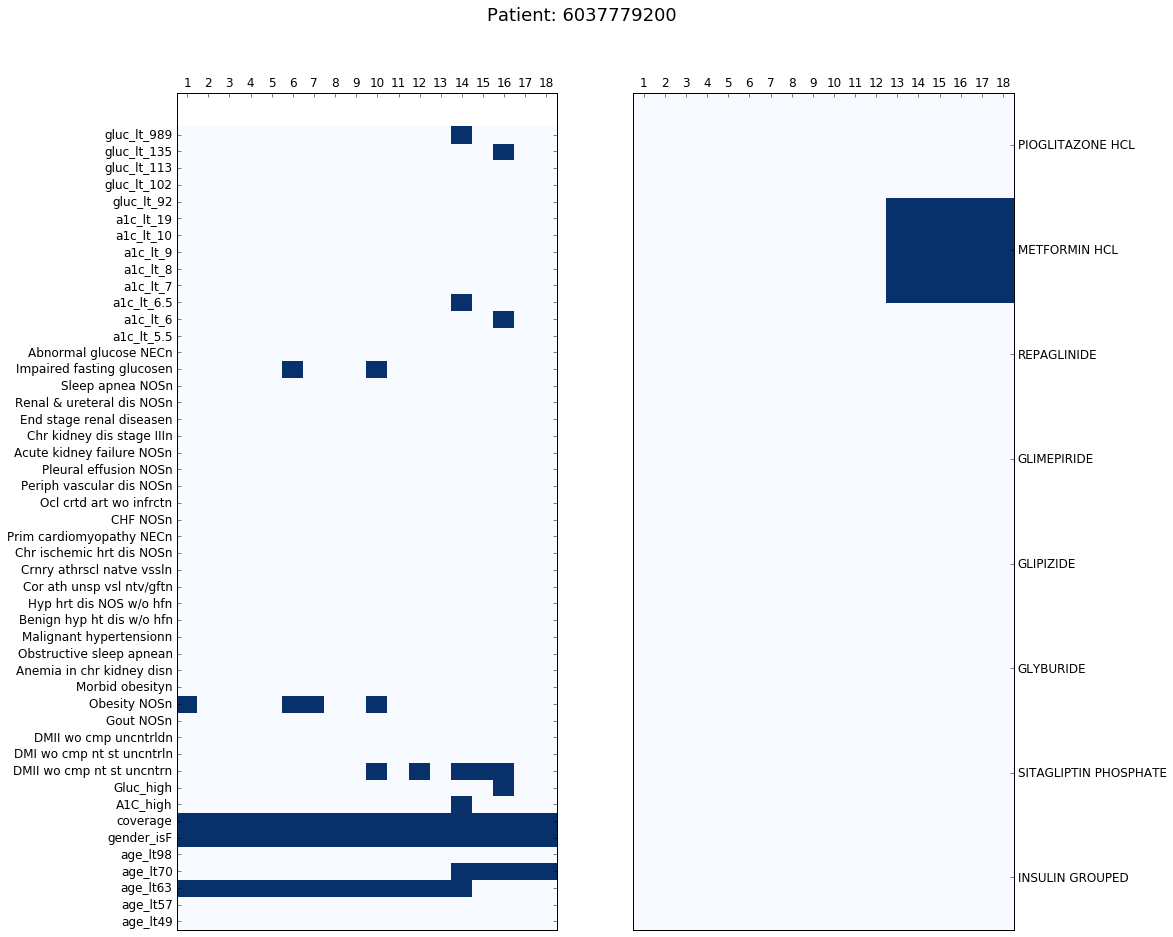

In [14]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['lines.linewidth']=3
mpl.rcParams['lines.markersize']=12
mpl.rcParams['font.family']='times'
mpl.rcParams['font.size'] = 18
mpl.rcParams['text.usetex']= False
mpl.rcParams['axes.labelsize']=38
mpl.rcParams['legend.fontsize']=38
#Save Visualizations of Training Data

patient_data = datapatfiltered_final
doctor_data = datadocfiltered_final
mids_data    = mids_filtered_final
patdict_data = patdict_filtered
docdict_data = docdict_filtered

shufidx = np.random.permutation(patient_data.shape[0])
idx = shufidx[5]
row_labels = patdict_data
data = patient_data[idx,:,:]
column_labels = range(1,data.shape[0]+1)
fig, axlist = plt.subplots(1,2,figsize=(15,15))
fig.suptitle('Patient: '+mids_data[idx])
ax = axlist[0]
heatmap = ax.pcolor(data.transpose(), cmap=plt.cm.Blues)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

# want a more natural, table-like display
#ax.invert_xaxis()
ax.xaxis.tick_top()

ax.tick_params(labelsize = 12)
ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)

ax = axlist[1]
data = doctor_data[idx,:,:]
column_labels = range(1,data.shape[0]+1)
row_labels = docdict_data
heatmap = ax.pcolor(data.transpose(), cmap=plt.cm.Blues)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

# want a more natural, table-like display
#ax.invert_xaxis()
ax.xaxis.tick_top()
ax.yaxis.tick_right()

ax.tick_params(labelsize = 12)
ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)
plt.figure(fig.number)
if os.path.exists('./training_data.pdf'):
    os.remove('./training_data.pdf')
plt.savefig('./training_data.pdf',bbox_inches='tight')

In [15]:
SAVEFOLDER = './datasets/medical/'
if not os.path.exists(SAVEFOLDER):
    os.mkdir(SAVEFOLDER)
patient_data = datapatfiltered_final
doctor_data = datadocfiltered_final
ind_data    = dataindfiltered_final
mids_data    = mids_filtered_final
patdict_data = patdict_filtered.tolist()
docdict_data = np.array(docdict_filtered).tolist()
inddict_data = inddict_filtered.tolist()

suffix = '_filtered'+str(K)+'months'+'_indicators'
print suffix

h5file = h5py.File(SAVEFOLDER+'medical'+suffix+'.h5',mode ='w')
h5file['T_patient'] = patient_data
h5file['T_doctor'] = doctor_data
h5file['T_indicator'] = ind_data
h5file.close()

f = open(SAVEFOLDER+'patient_list'+suffix+'.txt','w')
for idx,mid in enumerate(mids_data):
    f.write(mid)
    if idx!=len(mids_data)-1:
        f.write('\n')
f.close()

f = open(SAVEFOLDER+'doctor_dictionary'+suffix+'.txt','w')
for idx,mid in enumerate(docdict_data):
    f.write(mid)
    if idx!=len(docdict_data)-1:
        f.write('\n')
f.close()

f = open(SAVEFOLDER+'patient_dictionary'+suffix+'.txt','w')
for idx,mid in enumerate(patdict_data):
    f.write(mid)
    if idx!=len(patdict_data)-1:
        f.write('\n')
f.close()

f = open(SAVEFOLDER+'indicator_dictionary'+suffix+'.txt','w')
for idx,mid in enumerate(inddict_data):
    f.write(mid)
    if idx!=len(patdict_data)-1:
        f.write('\n')
f.close()

_filtered3months_indicators


In [16]:
import numpy as np
tmp = np.random.randn(20,)

In [17]:
train_valid,test_idx = tuple(np.split(tmp, [int(4*len(tmp)/5.)]))
train_idx,valid_idx  = tuple(np.split(train_valid, [int(4*len(train_valid)/5.)]))

In [18]:
print np.concatenate([train_idx,valid_idx,test_idx])-tmp

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
